In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [ ]:
web_sales = pd.read_csv("https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning_practice/main/Datasets/Webpage_Product_Sales.csv")
web_sales.head()

,ID,DayofMonth,Weekday,Month,Social_Network_Ref_links,Online_Ad_Paid_ref_links,Clicks_From_Serach_Engine,Special_Discount,Holiday,Server_Down_time_Sec,Web_UI_Score,Sales
0,1,1,2,1,1243,1704,1255,0,0,28,83,23291
1,2,2,3,1,765,1827,1260,0,0,9,87,25523
2,3,3,4,1,500,2200,1830,0,0,2,81,25620
3,4,4,5,1,373,1562,1336,0,0,11,77,19625
4,5,5,6,1,343,1810,1465,0,0,2,73,27231


In [ ]:
web_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         675 non-null    int64
 1   DayofMonth                 675 non-null    int64
 2   Weekday                    675 non-null    int64
 3   Month                      675 non-null    int64
 4   Social_Network_Ref_links   675 non-null    int64
 5   Online_Ad_Paid_ref_links   675 non-null    int64
 6   Clicks_From_Serach_Engine  675 non-null    int64
 7   Special_Discount           675 non-null    int64
 8   Holiday                    675 non-null    int64
 9   Server_Down_time_Sec       675 non-null    int64
 10  Web_UI_Score               675 non-null    int64
 11  Sales                      675 non-null    int64
dtypes: int64(12)
memory usage: 63.4 KB


In [ ]:
web_sales.describe()

,ID,DayofMonth,Weekday,Month,Social_Network_Ref_links,Online_Ad_Paid_ref_links,Clicks_From_Serach_Engine,Special_Discount,Holiday,Server_Down_time_Sec,Web_UI_Score,Sales
count,675.0,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,338.0,15.608889,3.995556,6.115556,832.927407,1898.340741,1551.552593,0.186667,0.056296,11.048889,79.937778,32650.835556
std,195.0,8.838876,1.998882,3.258175,327.959086,465.593150,493.082093,0.389933,0.230664,9.668956,11.722647,8095.608388
min,1.0,1.000000,1.000000,1.000000,301.000000,1100.000000,557.000000,0.000000,0.000000,0.000000,60.000000,17591.000000
25%,169.5,8.000000,2.000000,3.000000,546.500000,1507.000000,1110.500000,0.000000,0.000000,1.000000,69.500000,27713.500000
50%,338.0,16.000000,4.000000,6.000000,807.000000,1881.000000,1540.000000,0.000000,0.000000,10.000000,79.000000,31352.000000
75%,506.5,23.000000,6.000000,9.000000,1111.000000,2310.500000,1974.000000,0.000000,0.000000,20.000000,90.000000,35883.000000
max,675.0,31.000000,7.000000,12.000000,1400.000000,2699.000000,2553.000000,1.000000,1.000000,30.000000,100.000000,75674.000000


<Axes: >

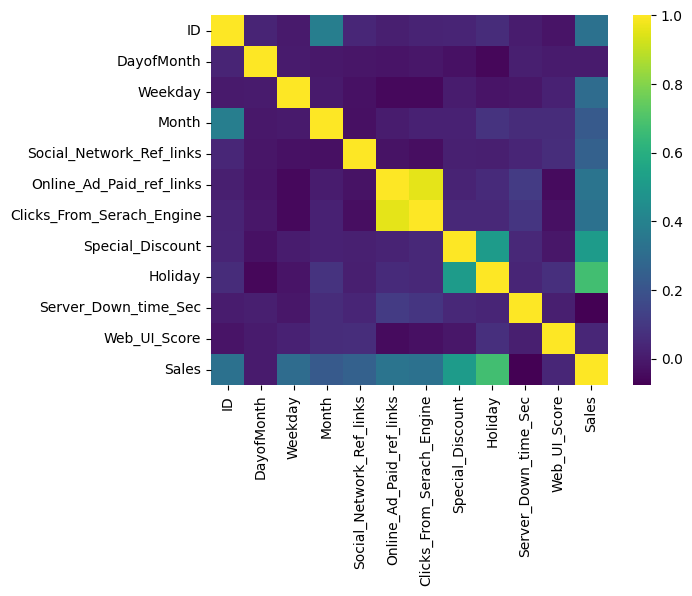

In [ ]:
sns.heatmap(data=web_sales.corr(),cmap="viridis" )

In [ ]:
web_sales.corr()["Sales"]

ID                           0.326202
DayofMonth                   0.001276
Weekday                      0.300737
Month                        0.224418
Social_Network_Ref_links     0.251789
Online_Ad_Paid_ref_links     0.339495
Clicks_From_Serach_Engine    0.326551
Special_Discount             0.511797
Holiday                      0.672750
Server_Down_time_Sec        -0.076400
Web_UI_Score                 0.039236
Sales                        1.000000
Name: Sales, dtype: float64

In [ ]:
x = web_sales.drop("Sales",axis=1)
ols(formula = "Sales ~ ID+DayofMonth+Weekday+Month+Social_Network_Ref_links+Online_Ad_Paid_ref_links+Clicks_From_Serach_Engine+Special_Discount+Holiday+Server_Down_time_Sec+Web_UI_Score",data = web_sales).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     385.1
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.51e-279
Time:                        01:48:23   Log-Likelihood:                -6356.6
No. Observations:                 675   AIC:                         1.274e+04
Df Residuals:                     663   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  4325.2719   1119.459      3.864      0.000    2127.160    6523.384
ID                            9.7487      0.644     15.130      0.000       8.484      11.014
DayofMonth                   39.6990     13.122      3.025      0.003      13.933      65.465
Weekday                    1351.9401     58.003     23.308      0.000    1238.048    1465.832
Month                       258.6016     38.714      6.680      0.000     182.585     334.618
Social_Network_Ref_links      6.3553      0.355     17.886      0.000       5.658       7.053
Online_Ad_Paid_ref_links      6.5745      0.865      7.599      0.000       4.876       8.273
Clicks_From_Serach_Engine    -0.5853      0.815     -0.718      0.473      -2.186       1.016
Special_Discount           4679.5382    346.880     13.490      0.000    3998.422    5360.655
Holiday                    1.854e+04    589.562     31.452      0.000    1.74e+04    1.97e+04
Server_Down_time_Sec       -130.2241     12.090    -10.772      0.000    -153.963    -106.485
Web_UI_Score                  1.0400      9.973      0.104      0.917     -18.543      20.623
==============================================================================
Omnibus:                      113.438   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              854.572
Skew:                           0.506   Prob(JB):                    2.70e-186
Kurtosis:                       8.418   Cond. No.                     2.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def vif(input_data):
    values = input_data
    columns = values.columns
    for i in range(0,columns.shape[0]):
        y = values[columns[i]]
        x = values[columns.drop(columns[i])]
        r2 = ols(formula="y~x",data=values).fit().rsquared
        vif = round((1/(1-r2)),2)
        print(columns[i],"vif = ",vif)
vif(web_sales.drop(columns="Sales"))

ID vif =  1.18
DayofMonth vif =  1.01
Weekday vif =  1.0
Month vif =  1.19
Social_Network_Ref_links vif =  1.02
Online_Ad_Paid_ref_links vif =  12.13
Clicks_From_Serach_Engine vif =  12.08
Special_Discount vif =  1.37
Holiday vif =  1.38
Server_Down_time_Sec vif =  1.02
Web_UI_Score vif =  1.02


In [ ]:
vif(web_sales.drop(columns=["Sales","Online_Ad_Paid_ref_links"]))

ID vif =  1.18
DayofMonth vif =  1.01
Weekday vif =  1.0
Month vif =  1.19
Social_Network_Ref_links vif =  1.01
Clicks_From_Serach_Engine vif =  1.02
Special_Discount vif =  1.36
Holiday vif =  1.38
Server_Down_time_Sec vif =  1.02
Web_UI_Score vif =  1.02


In [ ]:
x = web_sales.drop("Sales",axis=1)
ols(formula = "Sales ~ ID+DayofMonth+Weekday+Month+Social_Network_Ref_links+Clicks_From_Serach_Engine+Special_Discount+Holiday+Server_Down_time_Sec+Web_UI_Score",data = web_sales).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     385.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.24e-268
Time:                        01:48:24   Log-Likelihood:                -6384.8
No. Observations:                 675   AIC:                         1.279e+04
Df Residuals:                     664   BIC:                         1.284e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  8001.6484   1051.781      7.608      0.000    5936.432    1.01e+04
ID                            9.5921      0.671     14.296      0.000       8.275      10.910
DayofMonth                   37.3958     13.668      2.736      0.006      10.558      64.233
Weekday                    1347.1941     60.427     22.294      0.000    1228.543    1465.846
Month                       245.7666     40.296      6.099      0.000     166.644     324.889
Social_Network_Ref_links      6.4869      0.370     17.543      0.000       5.761       7.213
Clicks_From_Serach_Engine     5.3442      0.246     21.687      0.000       4.860       5.828
Special_Discount           4466.4997    360.217     12.399      0.000    3759.197    5173.802
Holiday                    1.887e+04    612.624     30.798      0.000    1.77e+04    2.01e+04
Server_Down_time_Sec       -123.0508     12.557     -9.799      0.000    -147.708     -98.394
Web_UI_Score                 -3.6736     10.371     -0.354      0.723     -24.037      16.689
==============================================================================
Omnibus:                      103.448   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.978
Skew:                           0.474   Prob(JB):                    2.46e-150
Kurtosis:                       7.858   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = web_sales.drop("Sales",axis=1)
ols(formula = "Sales ~ ID+DayofMonth+Weekday+Month+Social_Network_Ref_links+Clicks_From_Serach_Engine+Special_Discount+Holiday+Server_Down_time_Sec",data = web_sales).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     428.3
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          6.18e-270
Time:                        01:48:24   Log-Likelihood:                -6384.9
No. Observations:                 675   AIC:                         1.279e+04
Df Residuals:                     665   BIC:                         1.283e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  7715.6025    673.472     11.456      0.000    6393.215    9037.990
ID                            9.6031      0.670     14.338      0.000       8.288      10.918
DayofMonth                   37.3499     13.658      2.735      0.006      10.531      64.169
Weekday                    1346.6914     60.371     22.307      0.000    1228.151    1465.232
Month                       244.8297     40.182      6.093      0.000     165.930     323.730
Social_Network_Ref_links      6.4788      0.369     17.567      0.000       5.755       7.203
Clicks_From_Serach_Engine     5.3469      0.246     21.723      0.000       4.864       5.830
Special_Discount           4473.4333    359.449     12.445      0.000    3767.642    5179.224
Holiday                    1.885e+04    610.073     30.897      0.000    1.77e+04       2e+04
Server_Down_time_Sec       -123.1049     12.548     -9.811      0.000    -147.743     -98.466
==============================================================================
Omnibus:                      103.262   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.276
Skew:                           0.472   Prob(JB):                    3.49e-150
Kurtosis:                       7.856   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = web_sales.drop("Sales",axis=1)
ols(formula = "Sales ~ ID+DayofMonth+Weekday+Month+Social_Network_Ref_links+Clicks_From_Serach_Engine+Special_Discount+Holiday+Server_Down_time_Sec",data = web_sales).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     428.3
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          6.18e-270
Time:                        01:48:24   Log-Likelihood:                -6384.9
No. Observations:                 675   AIC:                         1.279e+04
Df Residuals:                     665   BIC:                         1.283e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  7715.6025    673.472     11.456      0.000    6393.215    9037.990
ID                            9.6031      0.670     14.338      0.000       8.288      10.918
DayofMonth                   37.3499     13.658      2.735      0.006      10.531      64.169
Weekday                    1346.6914     60.371     22.307      0.000    1228.151    1465.232
Month                       244.8297     40.182      6.093      0.000     165.930     323.730
Social_Network_Ref_links      6.4788      0.369     17.567      0.000       5.755       7.203
Clicks_From_Serach_Engine     5.3469      0.246     21.723      0.000       4.864       5.830
Special_Discount           4473.4333    359.449     12.445      0.000    3767.642    5179.224
Holiday                    1.885e+04    610.073     30.897      0.000    1.77e+04       2e+04
Server_Down_time_Sec       -123.1049     12.548     -9.811      0.000    -147.743     -98.466
==============================================================================
Omnibus:                      103.262   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.276
Skew:                           0.472   Prob(JB):                    3.49e-150
Kurtosis:                       7.856   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = web_sales.drop("Sales",axis=1)
ols(formula = "Sales ~ Holiday+Special_Discount+Online_Ad_Paid_ref_links+Weekday+Social_Network_Ref_links+Month+ID",data = web_sales).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     497.9
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          5.58e-260
Time:                        01:48:24   Log-Likelihood:                -6414.5
No. Observations:                 675   AIC:                         1.284e+04
Df Residuals:                     667   BIC:                         1.288e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4626.8168    739.353      6.258      0.000    3175.077    6078.557
Holiday                   1.845e+04    636.174     29.004      0.000    1.72e+04    1.97e+04
Special_Discount          4536.2427    374.734     12.105      0.000    3800.442    5272.043
Online_Ad_Paid_ref_links     5.6763      0.271     20.971      0.000       5.145       6.208
Weekday                   1354.1608     62.989     21.498      0.000    1230.480    1477.842
Social_Network_Ref_links     6.2069      0.384     16.155      0.000       5.452       6.961
Month                      231.6204     41.849      5.535      0.000     149.450     313.791
ID                           9.9587      0.698     14.268      0.000       8.588      11.329
==============================================================================
Omnibus:                       79.728   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.934
Skew:                           0.247   Prob(JB):                    1.88e-116
Kurtosis:                       7.325   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""